# Outlier detection 

Detect outliers using linear regression model and `statsmodels`. Based on [Stackoverflow question](http://stackoverflow.com/questions/10231206/can-scipy-stats-identify-and-mask-obvious-outliers).

In [1]:
import numpy as np

import statsmodels.api as sm # For some reason this import is necessary...
import statsmodels.formula.api as smapi
import statsmodels.graphics as smgraph

import matplotlib.pyplot as plt
%matplotlib inline

## Test data

Here were just making some fake data. First of all, make a list of x values from 0 to 29. Next, use the x values to generate some y data that is salted with some randomness. Finally, change the 7th value to a value that is clearly an outlier from the rest.

In [2]:
x = np.arange(30, dtype=float)
# Make some y data with random noise
y = 10 * x + 5.0*np.random.randn(30)
# Add outlier #
y[10] = 180.
y[20] = 130

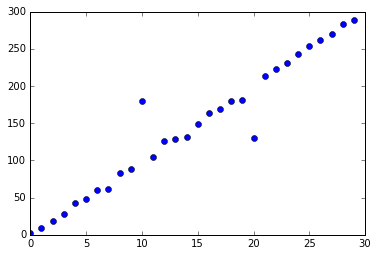

In [3]:
plt.plot(x, y, 'o')

## Regression

Here we're just doing an ordinary least squares method to fit the data. The "data ~ x" is just saying that 'data' (which is the y values) are directly related to 'x' values. This formalism apparently implies that data = m\*x + b.

In [4]:
# Make fit #
regression = smapi.ols("data ~ x", data=dict(data=y, x=x)).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   data   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     516.6
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           1.38e-19
Time:                        17:38:43   Log-Likelihood:                -131.89
No. Observations:                  30   AIC:                             267.8
Df Residuals:                      28   BIC:                             270.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.8516      7.239      0.532      0.599       -10.978    18.681
x              9.7437      0.429     22.728      0.000         8.866    10.622
==============================================================================
Omnibus:                       22.073   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.489
Skew:                           0.710   Prob(JB):                     6.95e-32
Kurtosis:                      13.620   Cond. No.                         33.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Test for Outliers

Here we're using our regression results to do a test for outliers. In this case, I guess the default is a [Bonferroni outlier test](https://www.google.com/search?q=Bonferroni+outlier+test). We're only printing off test results where the third column is less than 0.05.

### Find outliers 

In [5]:
test = regression.outlier_test()
test

,student_resid,unadj_p,bonf(p)
0,-0.044708,0.964669,1.000000
1,-0.259912,0.796904,1.000000
2,-0.233399,0.817212,1.000000
3,-0.229951,0.819863,1.000000
4,0.019132,0.984877,1.000000
5,-0.207936,0.836840,1.000000
6,-0.079930,0.936882,1.000000
7,-0.521356,0.606369,1.000000
8,0.070741,0.944126,1.000000
9,-0.171799,0.864877,1.000000


In [6]:
print('Bad data points (bonf(p) < 0.05):')
test[test['bonf(p)'] < 0.05]

Bad data points (bonf(p) < 0.05):


,student_resid,unadj_p,bonf(p)
10,5.854603,0.000003,0.000093
20,-4.498694,0.000117,0.003513


In [7]:
outliers = test[test['bonf(p)'] < 0.05].index.values
outliers

array([10, 20])

## Figure

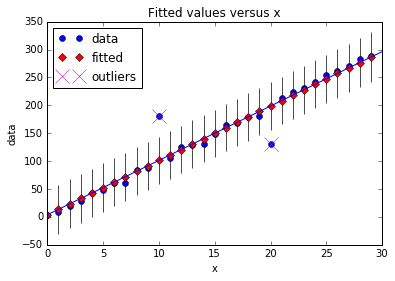

In [8]:
figure = smgraph.regressionplots.plot_fit(regression, 1)
line = smgraph.regressionplots.abline_plot(model_results=regression, ax=figure.axes[0])
plt.plot(outliers, y[outliers], 'xm', label='outliers', ms=14)
plt.legend(loc=0);

## Create a function and test it

In [11]:
import statsmodels.formula.api as smapi

def get_outliers(features, target):
    regression = smapi.ols("target ~ features", data=locals()).fit()
    test = regression.outlier_test()
    outliers = test[test['bonf(p)'] < 0.05]
    return list(outliers.index.values)



In [12]:
def test_outliers():
    x = np.arange(30, dtype=float)
    # Make some y data with random noise
    y = 10 * x + 5.0*np.random.randn(30)
    # Add outlier
    y[10] = 180.
    y[20] = 130  
    outliers = [10, 20]
    prediction = get_outliers(features=x, target=y)
    assert outliers == prediction
    
test_outliers()